In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [3]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [4]:
# Create a tensor
array_5d = np.full((2, 3, 2, 3, 2), 5)

tensor_5 = Tensor(array_5d)

print(tensor_5)
tensor_5.data

This tensor is of order 5 and consists of 72 elements.
Sizes and names of its modes are (2, 3, 2, 3, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]]],



       [[[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]],


        [[[5, 5],
          [5, 5],
          [5, 5]],

         [[5, 5],
          [5, 5],
          [5, 5]]]]])

In [5]:
# Calculate Frobenious norm
tensor_5.frob_norm

42.42640687119285

### Solution: Part 2

In [6]:
# Create tensors and collect information
elements = []
order = []
for i in range(3,21):
    lst = [2]*i
    array = np.full(lst, 1)
    tensor = Tensor(array)
    order.append(tensor.order)
    elements.append(tensor.size)

Text(0.5, 1.0, 'Number of Elements against Tensor order with size 2')

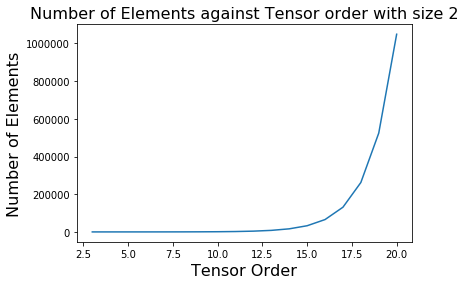

In [9]:
# Plot results
plt.plot(order,elements)

plt.xlabel(r'Tensor Order',fontsize=16)
plt.ylabel(r'Number of Elements',fontsize=16)
plt.title(r"Number of Elements against Tensor order with size 2",fontsize=16)

### Solution: Part 3

In [10]:
# Create tensors and collect information
size = []
ele = []
for i in range(3,17):
    array = np.full((i,i,i), 1)
    tensor = Tensor(array)
    size.append(i)
    ele.append(tensor.size)

Text(0.5, 1.0, 'Number of Elements against Tensor size with order 3')

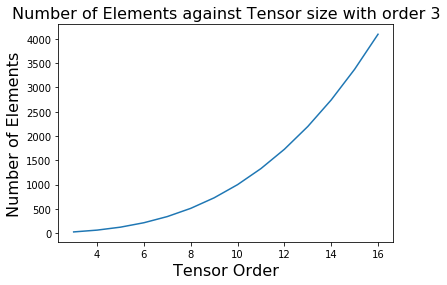

In [11]:
# Plot results
plt.plot(size,ele)

plt.xlabel(r'Tensor Order',fontsize=16)
plt.ylabel(r'Number of Elements',fontsize=16)
plt.title(r"Number of Elements against Tensor size with order 3",fontsize=16)

### Solution: Part 4

The number of elements against tensor order gives an exponential increase, whereas the number of elements against tensor size gives a more gradual increase. This is due to the fact that for the order, the number of elements in this case correspond to 2^(order). For the size, the number of elements is equal to (size x 3) as it is of order 3. Increasing the order, can drastically increase the number of elements present in the tensor.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [10]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [11]:
# Frontal slice
tensor.data[0,:,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [9]:
# Create a tensor of order 4
array_4d = np.arange(81).reshape((3, 3, 3, 3))
tensor_4 = Tensor(array_4d)

In [17]:
# Display slices
for i in range(0,3):
    print(tensor_4.data[i,:,:,:])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
[[[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]]]
[[[54 55 56]
  [57 58 59]
  [60 61 62]]

 [[63 64 65]
  [66 67 68]
  [69 70 71]]

 [[72 73 74]
  [75 76 77]
  [78 79 80]]]


In [16]:
# Display fibers
for p in range(0,3):
    print(tensor_4.data[1,:,2,p])
    
for i in range(0,2):
    print(tensor_4.data[1,:,i,2])

[33 42 51]
[34 43 52]
[35 44 53]
[29 38 47]
[32 41 50]


### Solution: Part 2

In [11]:
# Create a tensor of order 3
array3 = np.full((4,2,5), 1)
for k in range(1,5):
    array3[:,:,k] = 2*array3[3,1,k-1]

tensor3 = Tensor(array3)
for i in range(0,5):
    print(tensor3.data[:,:,i])

[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[2 2]
 [2 2]
 [2 2]
 [2 2]]
[[4 4]
 [4 4]
 [4 4]
 [4 4]]
[[8 8]
 [8 8]
 [8 8]
 [8 8]]
[[16 16]
 [16 16]
 [16 16]
 [16 16]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [16]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [17]:
# Create a tensor
array4 = np.arange(360).reshape((8, 5, 3, 3))

tensor4 = Tensor(array4)

tensor4.unfold(mode=1)

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.

In [18]:
# Display unfolded version
print(tensor4)
tensor4.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,  45,  46,  47,  48,
         49,  50,  51,  52,  53,  90,  91,  92,  93,  94,  95,  96,  97,
         98, 135, 136, 137, 138, 139, 140, 141, 142, 143, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 225, 226, 227, 228, 229, 230, 231,
        232, 233, 270, 271, 272, 273, 274, 275, 276, 277, 278, 315, 316,
        317, 318, 319, 320, 321, 322, 323],
       [  9,  10,  11,  12,  13,  14,  15,  16,  17,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 144, 145, 146, 147, 148, 149, 150, 151, 152, 189, 190, 191,
        192, 193, 194, 195, 196, 197, 234, 235, 236, 237, 238, 239, 240,
        241, 242, 279, 280, 281, 282, 283, 284, 285, 286, 287, 324, 325,
        326, 327, 328, 329, 330, 331, 332],
       [ 18,  19,  20,  21,  22,  23,  24,  25,  26,  63,  64,  65,  66,
         67,  68,  69,  70,  71, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 153, 154, 155, 156, 157

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


40

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [32]:
# Create original tensor 
I, J, K = 10, 4, 2

array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

In [33]:
# Create matrix
J_new = 5
A = np.arange(J_new * J).reshape(J_new, J)

In [36]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

In [35]:
# Validate equivalence between the left and right hand side
print(Y)
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (10, 5, 2) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[  28,   34,   76,   82,  124,  130,  172,  178,  220,  226,  268,
         274,  316,  322,  364,  370,  412,  418,  460,  466],
       [  76,   98,  252,  274,  428,  450,  604,  626,  780,  802,  956,
         978, 1132, 1154, 1308, 1330, 1484, 1506, 1660, 1682],
       [ 124,  162,  428,  466,  732,  770, 1036, 1074, 1340, 1378, 1644,
        1682, 1948, 1986, 2252, 2290, 2556, 2594, 2860, 2898],
       [ 172,  226,  604,  658, 1036, 1090, 1468, 1522, 1900, 1954, 2332,
        2386, 2764, 2818, 3196, 3250, 3628, 3682, 4060, 4114],
       [ 220,  290,  780,  850, 1340, 1410, 1900, 1970, 2460, 2530, 3020,
        3090, 3580, 3650, 4140, 4210, 4700, 4770, 5260, 5330]])

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [31]:
# Create tensor
I, J, K = 2, 3, 4
J_new, K_new = 5, 6

array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

In [23]:
# Create matrices
A = np.arange(J_new * J).reshape(J_new, J)
B = np.arange(K_new * K).reshape(K_new, K)

B1 = np.arange(K_new * J_new).reshape(K_new, J_new)

In [21]:
# Validate property 1
Y1 = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B, mode=2, inplace=False)
Y2 = X.mode_n_product(B, mode=2, inplace=False).mode_n_product(A, mode=1, inplace=False)
np.testing.assert_array_equal(Y1.data, Y2.data)
print('The underlying data arrays are equal for all of them.')

The underlying data arrays are equal for all of them.


In [26]:
# Validate property 2
Y4 = X.mode_n_product(A, mode=1, inplace=False).mode_n_product(B1, mode=1, inplace=False)
Y5 = X.mode_n_product(np.dot(B1,A), mode=1, inplace=False)
np.testing.assert_array_equal(Y4.data, Y5.data)
print('The underlying data arrays are equal for all of them.')

The underlying data arrays are equal for all of them.


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [33]:
%%latex
The n-mode product is defined as:
    \begin{equation}
           (\mathbf{\underline{X}} \times_{n} \mathbf{A}) = \sum_{i_{n}=1}^{I_{N}} \underline{X}_{i_{1},i_{2}...i_{N}}A_{ji_{n}}
    \end{equation}
Therefore we have:
\begin{equation}
    \mathbf{\underline{X}} \times_{n} \mathbf{A} \times_{n} \mathbf{B} = \sum_{j_{n} = 1}^{J_{N}}(\sum_{i_{n}=1}^{I_{N}} \underline{X}_{i_{1},i_{2}...i_{N}}A_{j_{n}i_{n}})B_{kj_{n}} = \sum_{i_{n}=1}^{I_{N}} \underline{X}_{i_{1},i_{2}...i_{N}} \sum_{j_{n} = 1}^{J_{N}} A_{j_{n}i_{n}}B_{kj_{n}} =  \sum_{i_{n}=1}^{I_{N}} \underline{X}_{i_{1},i_{2}...i_{N}} \sum_{j_{n} = 1}^{J_{N}} B_{kj_{n}}A_{j_{n}i_{n}} =  \mathbf{\underline{X}} \times_{n} (\mathbf{BA})                   
\end{equation}
This corresonds to the affirmation of property 2

<IPython.core.display.Latex object>